# Notebook de comparaison de tous les modèles

Dans ce notebook vous retrouverez une analyse des performances de tous les modèles étudiés (Modèle from scratch, VGG16, DENSE121 et XCEPTION). Cette analyse permets de comparer ces derniers et de déterminer les plus performants

## Extraction des modèles

    Importation des modules nécessaires

In [1]:
import os

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
#Extraction des features

validation_generator =
#Uniquement de validation car les features d'entrainement sont répertoriées dans l'historique

validation_features_VGG16 = np.load(open('models/validationFeatures_VGG16_AllData.npy', 'rb'))
validation_features_DENSE121 = np.load(open('models/validationFeatures_Dense121_AllData.npy', 'rb'))
validation_features_XCEPTION = np.load(open('models/validationFeatures_Xception_AllData.npy', 'rb'))

In [3]:
# On définit les labels 

validation_labels = np.array([0] * 116 + [1] * 300)
validation_labels2 = np.array([0] * 96 + [1] * 96)
validation_samples = 1200

In [4]:
#Récupération des modeles avec les differentes couches fully connected

model_SCRATCH = tf.keras.models.load_model('../memory/FullModels/scratch_224_224_10G')

model_VGG16_heavy = tf.keras.models.load_model('../memory/FullModels/vgg16_heavyTop_224_224_10G')
model_VGG16_medium = tf.keras.models.load_model('../memory/FullModels/vgg16_mediumTop_224_224_10G')
model_VGG16_light = tf.keras.models.load_model('../memory/FullModels/vgg16_lightTop_224_224_10G')


model_DENSE121_heavy = tf.keras.models.load_model('../memory/FullModels/dense121_heavyTop_224_224_10G')
model_DENSE121_medium = tf.keras.models.load_model('../memory/FullModels/dense121_mediumTop_224_224_10G')
model_DENSE121_light = tf.keras.models.load_model('../memory/FullModels/dense121_lightTop_224_224_10G')

model_XCEPTION_heavy = tf.keras.models.load_model('../memory/FullModels/xception_heavyTop_224_224_10G')
model_XCEPTION_medium = tf.keras.models.load_model('../memory/FullModels/xception_mediumTop_224_224_10G')
model_XCEPTION_light = tf.keras.models.load_model('../memory/FullModels/xception_lightTop_224_224_10G')

## Évaluation des modèles

In [5]:
#On évalue les modèles 

#Modele from scratch
#eval_SCRATCH = model_SCRATCH.evaluate_generator(validation_features_VGG16, validation_samples)

#VGG16
print ("VGG16 evaluations:")
eval_VGG16_heavy = model_VGG16_heavy.evaluate(validation_features_VGG16, validation_labels,verbose=2)
eval_VGG16_medium = model_VGG16_medium.evaluate(validation_features_VGG16, validation_labels,verbose=2)
eval_VGG16_light = model_VGG16_light.evaluate(validation_features_VGG16, validation_labels,verbose=2)


#DENSE121
print ("DENSE121 evaluations:")
eval_DENSE121_heavy = model_DENSE121_heavy.evaluate(validation_features_DENSE121, validation_labels,verbose=2)
eval_DENSE121_medium = model_DENSE121_medium.evaluate(validation_features_DENSE121, validation_labels,verbose=2)
eval_DENSE121_light = model_DENSE121_light.evaluate(validation_features_DENSE121, validation_labels,verbose=2)

#XCEPTION
print ("XCEPTION evaluations:")
eval_XCEPTION_heavy = model_XCEPTION_heavy.evaluate(validation_features_XCEPTION, validation_labels2,verbose=2)
eval_XCEPTION_medium = model_XCEPTION_medium.evaluate(validation_features_XCEPTION, validation_labels2,verbose=2)
eval_XCEPTION_light = model_XCEPTION_light.evaluate(validation_features_XCEPTION, validation_labels2,verbose=2)

VGG16 evaluations:
13/13 - 0s - loss: 0.0032 - accuracy: 0.9976
13/13 - 0s - loss: 0.0103 - accuracy: 0.9952
13/13 - 0s - loss: 0.0049 - accuracy: 0.9976
DENSE121 evaluations:
13/13 - 0s - loss: 0.0758 - accuracy: 0.9952
13/13 - 0s - loss: 0.0494 - accuracy: 0.9952
13/13 - 0s - loss: 0.0376 - accuracy: 0.9928
XCEPTION evaluations:
6/6 - 0s - loss: 1.2982 - accuracy: 0.8958
6/6 - 0s - loss: 1.2707 - accuracy: 0.6771
6/6 - 0s - loss: 0.6957 - accuracy: 0.8958


## Visualisation de l'évaluation

### Dans un premier temps pour la LOSS

Nous allons comparer les LOSS d'évaluation dans un premier temps sur chaque modèle respectif mais avec plusieurs couches fully connected différentes

    Pour le modèle VGG16:

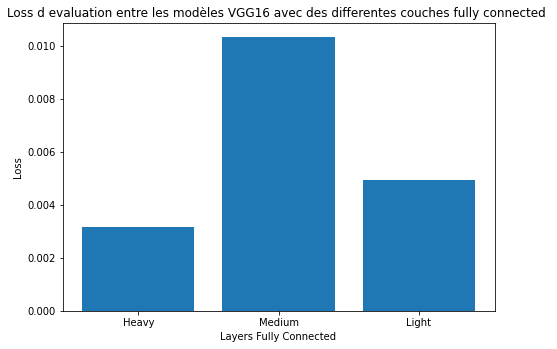

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Heavy', 'Medium','Light']
values = [eval_VGG16_heavy[0],eval_VGG16_medium[0],eval_VGG16_light[0]]
ax.bar(labels,values)
plt.title('Loss d evaluation entre les modèles VGG16 avec des differentes couches fully connected ')
plt.xlabel('Layers Fully Connected')
plt.ylabel('Loss')
plt.show()

La meilleure LOSS correspond à la valeur la plus faible on séléctionne donc le modèle heavy pour le modèle VGG16

        Pour le modèle DENSE121:

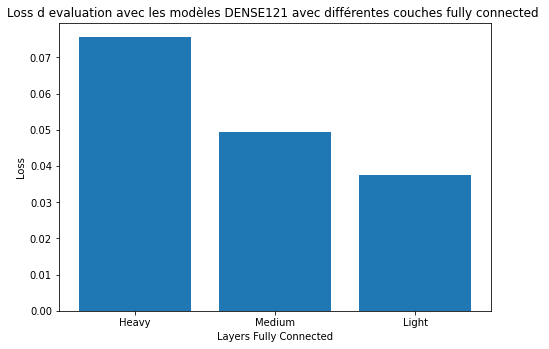

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Heavy', 'Medium','Light']
values = [eval_DENSE121_heavy[0],eval_DENSE121_medium[0],eval_DENSE121_light[0]]
ax.bar(labels,values)
plt.title('Loss d evaluation avec les modèles DENSE121 avec différentes couches fully connected ')
plt.xlabel('Layers Fully Connected')
plt.ylabel('Loss')
plt.show()

La meilleure LOSS correspond à la valeur la plus faible on séléctionne donc le modèle light pour le modèle DENSE 121

        Pour le modèle XCEPTION:

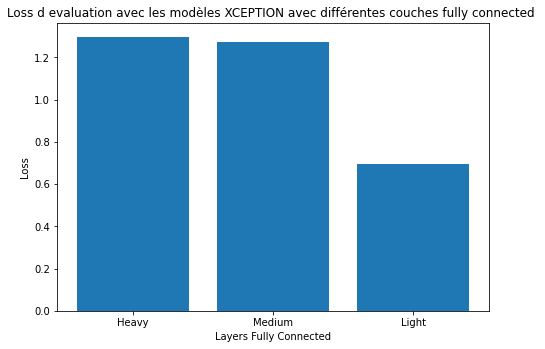

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Heavy', 'Medium','Light']
values = [eval_XCEPTION_heavy[0],eval_XCEPTION_medium[0],eval_XCEPTION_light[0]]
ax.bar(labels,values)
plt.title('Loss d evaluation avec les modèles XCEPTION avec différentes couches fully connected ')
plt.xlabel('Layers Fully Connected')
plt.ylabel('Loss')
plt.show()

On séléctionne donc pour la suite de notre étude le modèle light pour le modèle XCEPTION

Maintenant grâce à la sélection de la couche fully connected dans chaque modèle ayant une loss plus perfomante on réalise une étude sur les modèles entre eux:


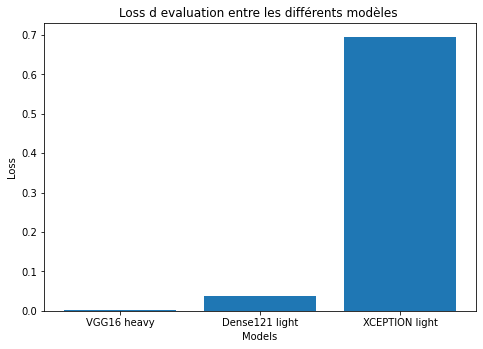

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['VGG16 heavy','Dense121 light','XCEPTION light']
values = [eval_VGG16_heavy[0],eval_DENSE121_light[0],eval_XCEPTION_light[0]]
ax.bar(labels,values)
plt.title('Loss d evaluation entre les différents modèles ')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.show()

Le modèle le plus performant au niveau de la LOSS (somme des erreurs effectuée pendant l'évaluation), est donc le modèle VGG16 avec une couche fully connected heavy.

### Pour l'ACCURACY

Nous allons comparer les ACCURACY d'évaluations dans un premier temps sur chaque modèle respectif mais avec plusieurs couches fully connected différentes

        Pour le modèle VGG16:

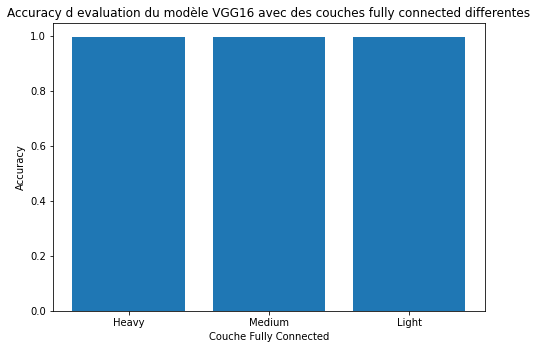

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Heavy', 'Medium','Light']
values = [eval_VGG16_heavy[1],eval_VGG16_medium[1],eval_VGG16_light[1]]
ax.bar(labels,values)
plt.title('Accuracy d evaluation du modèle VGG16 avec des couches fully connected differentes')
plt.xlabel('Couche Fully Connected')
plt.ylabel('Accuracy')
plt.show()


Le modèle VGG16 à une accuracy identique avec une couche fully connected heavy ou light, nous allons donc séléctionner le modèle heavy car il a également la loss la plus faible

        Pour le modèle DENSE121:

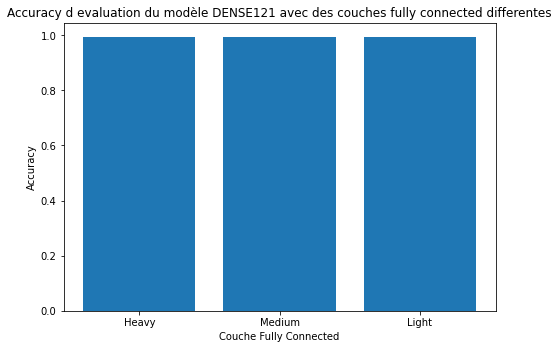

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Heavy', 'Medium','Light']
values = [eval_DENSE121_heavy[1],eval_DENSE121_medium[1],eval_DENSE121_light[1]]
ax.bar(labels,values)
plt.title('Accuracy d evaluation du modèle DENSE121 avec des couches fully connected differentes')
plt.xlabel('Couche Fully Connected')
plt.ylabel('Accuracy')
plt.show()

Le modèle DENSE 121 à une accuracy identique avec une couche fully connected heavy ou medium, nous allons donc séléctionner le modèle medium car il a également la loss la plus faible entre ces derniers

        Pour le modèle XCEPTION:

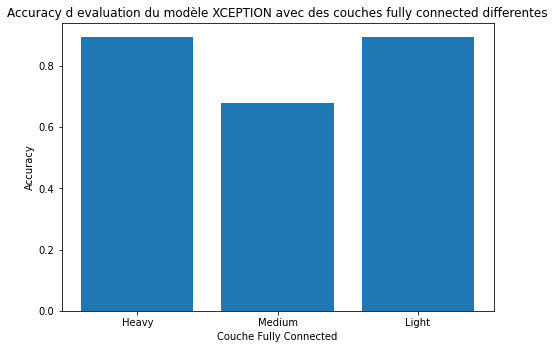

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Heavy', 'Medium','Light']
values = [eval_XCEPTION_heavy[1],eval_XCEPTION_medium[1],eval_XCEPTION_light[1]]
ax.bar(labels,values)
plt.title('Accuracy d evaluation du modèle XCEPTION avec des couches fully connected differentes')
plt.xlabel('Couche Fully Connected')
plt.ylabel('Accuracy')
plt.show()

Le modèle DENSE XCEPTION à une accuracy plus faible avec une couche fully connected medium, nous allons donc séléctionner ce dernier. 

Maintenant grâce à la sélection de la couche fully connected dans chaque modèle ayant une accuracy plus perfomante on réalise une étude sur les modèles entre eux:

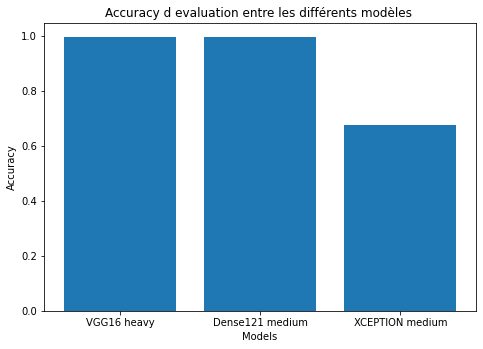

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['VGG16 heavy','Dense121 medium','XCEPTION medium']
values = [eval_VGG16_heavy[1],eval_DENSE121_medium[1],eval_XCEPTION_medium[1]]
ax.bar(labels,values)
plt.title('Accuracy d evaluation entre les différents modèles ')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

Le modèle le plus performant au niveau de l'accuracy (pourcentage de réussite), est donc le modèle XCEPTION avec une couche fully connected medium.

## Extraction des historiques

In [15]:
#Chargement de l'historique des differents modèles

history_FROMSCRATCH = np.load('../memory/history/historique_hugo_scratch_224_224_10G.npy', allow_pickle='TRUE').item()

#DENSE121
history_DENSE121_light = np.load('../memory/history/historique_chourouk_dense121_224_224_light_10G.npy', allow_pickle='TRUE').item()
history_DENSE121_medium = np.load('../memory/history/historique_chourouk_dense121_224_224_medium_10G.npy', allow_pickle='TRUE').item()
history_DENSE121_heavy = np.load('../memory/history/historique_chourouk_dense121_224_224_heavy_10G.npy', allow_pickle='TRUE').item()

#VGG16
history_VGG16_light = np.load('../memory/history/historique_chourouk_vgg16_224_224_light_10G.npy', allow_pickle='TRUE').item()
history_VGG16_medium = np.load('../memory/history/historique_chourouk_vgg16_224_224_medium_10G.npy', allow_pickle='TRUE').item()
history_VGG16_heavy = np.load('../memory/history/historique_chourouk_vgg16_224_224_heavy_10G.npy', allow_pickle='TRUE').item()

#XCEPTION
history_XCEPTION_light = np.load('../memory/history/historique_chourouk_xception_224_224_light_10G.npy', allow_pickle='TRUE').item()
history_XCEPTION_medium = np.load('../memory/history/historique_chourouk_xception_224_224_medium_10G.npy', allow_pickle='TRUE').item()
history_XCEPTION_heavy = np.load('../memory/history/historique_chourouk_xception_224_224_heavy_10G.npy', allow_pickle='TRUE').item()

#history_VGG16 = np.load('../memory/history/historique_loic_50G_scratch.npy', allow_pickle='TRUE').item()

## Visualisation de l'historique

### Nous allons commencer par visualiser l'historique d'entrainement (TRAIN)

#### Dans un premier temps nous selectionnerons la meilleur couche fully connected dans chaque modèle respectif

       Pour le modèle VGG16:

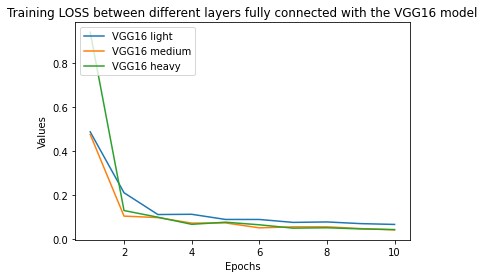

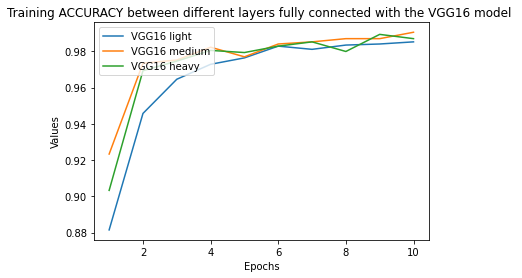

In [24]:
epochs = range(1,11)
plt.plot(epochs, history_VGG16_light['loss'], label='VGG16 light')
plt.plot(epochs, history_VGG16_medium['loss'], label='VGG16 medium')
plt.plot(epochs, history_VGG16_heavy['loss'], label='VGG16 heavy')
plt.title('Training LOSS between different layers fully connected with the VGG16 model')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()

epochs = range(1,11)

plt.plot(epochs, history_VGG16_light['accuracy'], label='VGG16 light')
plt.plot(epochs, history_VGG16_medium['accuracy'], label='VGG16 medium')
plt.plot(epochs, history_VGG16_heavy['accuracy'], label='VGG16 heavy')
plt.title('Training ACCURACY between different layers fully connected with the VGG16 model ')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()


Nous pouvons donc séléctionner la couche fully connected medium pour le modèle VGG16

        Pour le modèle DENSE121:

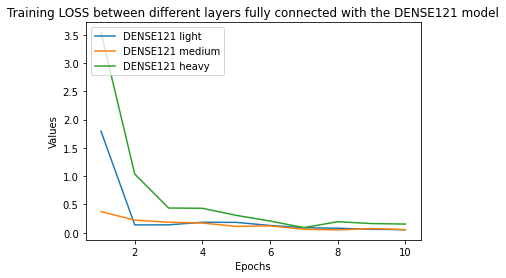

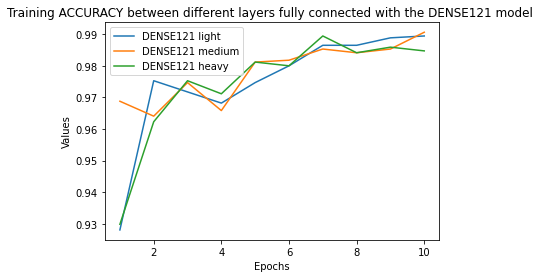

In [23]:
epochs = range(1,11)
plt.plot(epochs, history_DENSE121_light['loss'], label='DENSE121 light')
plt.plot(epochs, history_DENSE121_medium['loss'], label='DENSE121 medium')
plt.plot(epochs, history_DENSE121_heavy['loss'], label='DENSE121 heavy')
plt.title('Training LOSS between different layers fully connected with the DENSE121 model')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()

epochs = range(1,11)

plt.plot(epochs, history_DENSE121_light['accuracy'], label='DENSE121 light')
plt.plot(epochs, history_DENSE121_medium['accuracy'], label='DENSE121 medium')
plt.plot(epochs, history_DENSE121_heavy['accuracy'], label='DENSE121 heavy')
plt.title('Training ACCURACY between different layers fully connected with the DENSE121 model ')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()


Nous pouvons donc séléctionner le modèle dense121 avec une couche fully connected medium

        Pour le modèle XCEPTION:

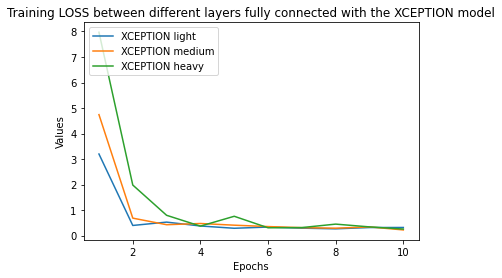

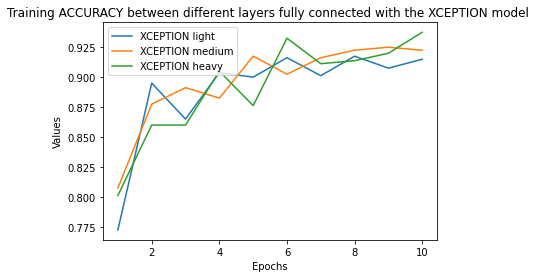

In [25]:
epochs = range(1,11)
plt.plot(epochs, history_XCEPTION_light['loss'], label='XCEPTION light')
plt.plot(epochs, history_XCEPTION_medium['loss'], label='XCEPTION medium')
plt.plot(epochs, history_XCEPTION_heavy['loss'], label='XCEPTION heavy')
plt.title('Training LOSS between different layers fully connected with the XCEPTION model')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()

epochs = range(1,11)

plt.plot(epochs, history_XCEPTION_light['accuracy'], label='XCEPTION light')
plt.plot(epochs, history_XCEPTION_medium['accuracy'], label='XCEPTION medium')
plt.plot(epochs, history_XCEPTION_heavy['accuracy'], label='XCEPTION heavy')
plt.title('Training ACCURACY between different layers fully connected with the XCEPTION model ')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()


Nous pouvons donc séléctionner la couche fully connected heavy pour le modèle XCEPTION

#### Nous procedons maintenant à une visualisation de l'historique de l'entrainement entre les differents modèles avec la couche fully connected sélectionnée auparavant:

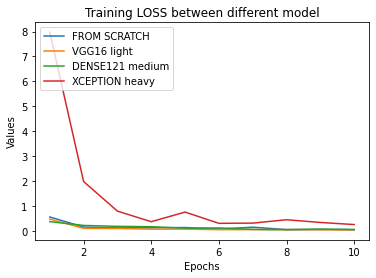

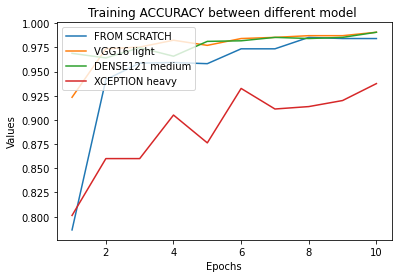

In [35]:
epochs = range(1,11)

plt.plot(epochs, history_FROMSCRATCH['loss'], label='FROM SCRATCH')
plt.plot(epochs, history_VGG16_medium['loss'], label='VGG16 light')
plt.plot(epochs, history_DENSE121_medium['loss'], label='DENSE121 medium')
plt.plot(epochs, history_XCEPTION_heavy['loss'], label='XCEPTION heavy')
plt.title('Training LOSS between different model')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()

epochs = range(1,11)

plt.plot(epochs, history_FROMSCRATCH['accuracy'], label='FROM SCRATCH')
plt.plot(epochs, history_VGG16_medium['accuracy'], label='VGG16 light')
plt.plot(epochs, history_DENSE121_medium['accuracy'], label='DENSE121 medium')
plt.plot(epochs, history_XCEPTION_heavy['accuracy'], label='XCEPTION heavy')
plt.title('Training ACCURACY between different model ')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()


#### Nous allons ensuite visualiser l'historique de validation (VAL):

Dans chaque modèle respectif

       Pour le modèle VGG16:

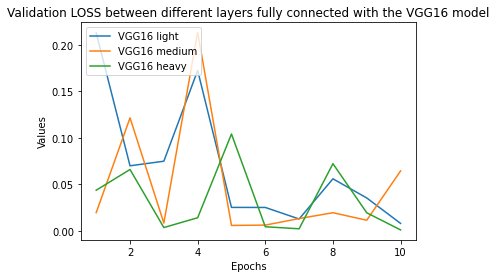

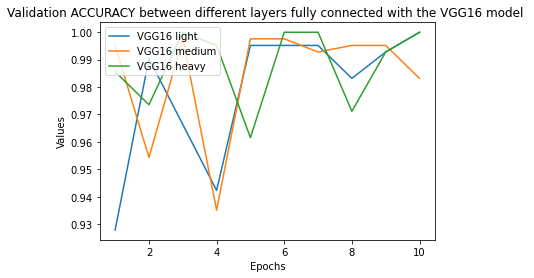

In [29]:
epochs = range(1,11)
plt.plot(epochs, history_VGG16_light['val_loss'], label='VGG16 light')
plt.plot(epochs, history_VGG16_medium['val_loss'], label='VGG16 medium')
plt.plot(epochs, history_VGG16_heavy['val_loss'], label='VGG16 heavy')
plt.title('Validation LOSS between different layers fully connected with the VGG16 model')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()

epochs = range(1,11)

plt.plot(epochs, history_VGG16_light['val_accuracy'], label='VGG16 light')
plt.plot(epochs, history_VGG16_medium['val_accuracy'], label='VGG16 medium')
plt.plot(epochs, history_VGG16_heavy['val_accuracy'], label='VGG16 heavy')
plt.title('Validation ACCURACY between different layers fully connected with the VGG16 model ')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()

Nous sélectionnerons la couche fully connected heavy pour le modèle VGG16

        Pour le modèle DENSE121:

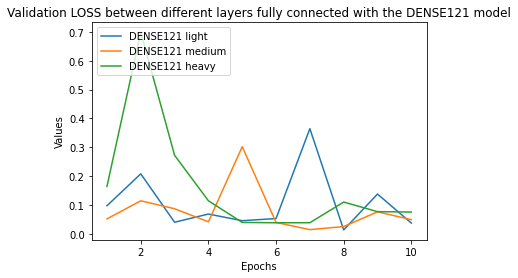

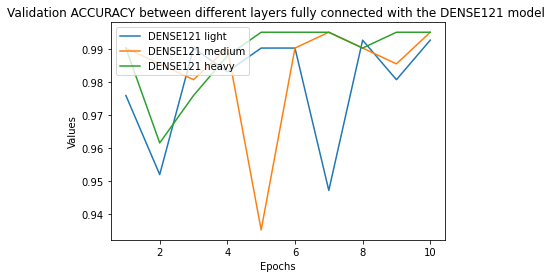

In [33]:
epochs = range(1,11)
plt.plot(epochs, history_DENSE121_light['val_loss'], label='DENSE121 light')
plt.plot(epochs, history_DENSE121_medium['val_loss'], label='DENSE121 medium')
plt.plot(epochs, history_DENSE121_heavy['val_loss'], label='DENSE121 heavy')
plt.title('Validation LOSS between different layers fully connected with the DENSE121 model')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()

epochs = range(1,11)

plt.plot(epochs, history_DENSE121_light['val_accuracy'], label='DENSE121 light')
plt.plot(epochs, history_DENSE121_medium['val_accuracy'], label='DENSE121 medium')
plt.plot(epochs, history_DENSE121_heavy['val_accuracy'], label='DENSE121 heavy')
plt.title('Validation ACCURACY between different layers fully connected with the DENSE121 model ')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()


Nous décidons donc de sélectionner la couche fully connected medium pour le modèle DENSE121

        Pour le modèle XCEPTION:

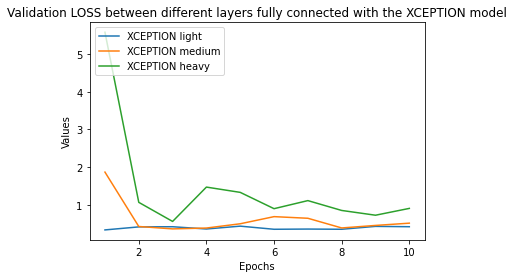

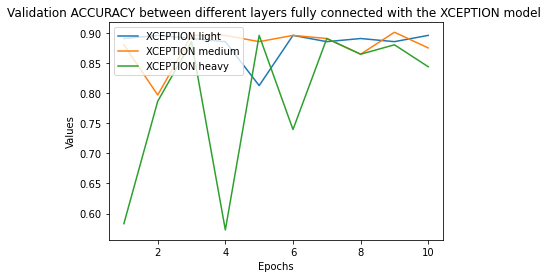

In [31]:
epochs = range(1,11)
plt.plot(epochs, history_XCEPTION_light['val_loss'], label='XCEPTION light')
plt.plot(epochs, history_XCEPTION_medium['val_loss'], label='XCEPTION medium')
plt.plot(epochs, history_XCEPTION_heavy['val_loss'], label='XCEPTION heavy')
plt.title('Validation LOSS between different layers fully connected with the XCEPTION model')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()

epochs = range(1,11)

plt.plot(epochs, history_XCEPTION_light['val_accuracy'], label='XCEPTION light')
plt.plot(epochs, history_XCEPTION_medium['val_accuracy'], label='XCEPTION medium')
plt.plot(epochs, history_XCEPTION_heavy['val_accuracy'], label='XCEPTION heavy')
plt.title('Validation ACCURACY between different layers fully connected with the XCEPTION model ')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()

On sélectionne la couche fully connected light pour le modèle XCEPTION

#### Nous procedons maintenant à une visualisation de l'historique de l'entrainement entre les differents modèles avec la couche fully connected sélectionnée auparavant:

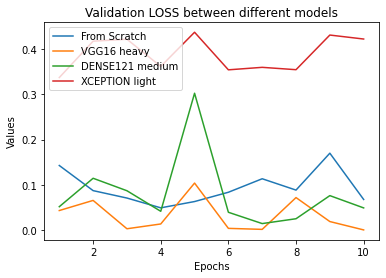

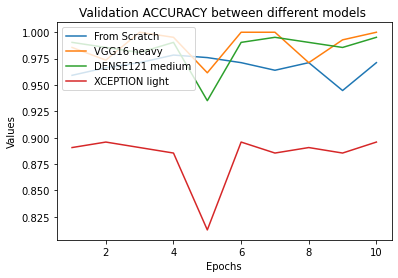

In [37]:
epochs = range(1,11)

plt.plot(epochs, history_FROMSCRATCH['val_loss'], label='From Scratch')
plt.plot(epochs, history_VGG16_heavy['val_loss'], label='VGG16 heavy')
plt.plot(epochs, history_DENSE121_medium['val_loss'], label='DENSE121 medium')
plt.plot(epochs, history_XCEPTION_light['val_loss'], label='XCEPTION light')
plt.title('Validation LOSS between different models')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()

epochs = range(1,11)

plt.plot(epochs, history_FROMSCRATCH['val_accuracy'], label='From Scratch')
plt.plot(epochs, history_VGG16_heavy['val_accuracy'], label='VGG16 heavy')
plt.plot(epochs, history_DENSE121_medium['val_accuracy'], label='DENSE121 medium')
plt.plot(epochs, history_XCEPTION_light['val_accuracy'], label='XCEPTION light')
plt.title('Validation ACCURACY between different models ')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()
